In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
eval_df = pd.read_csv("eval_df.csv")
eval_df.columns

Index(['citing_cluster_id', 'cited_cluster_id', 'citing_decision_link',
       'citing_decision_name', 'cited_decision_name',
       'cited_decision_citations', 'cited_decision', 'gpt_prediction',
       'gpt_quote', 'gpt_rationale', 'claude_prediction', 'claude_quote',
       'claude_rationale', 'claude4_pred', 'claude4_quote',
       'claude4_rationale', 'Pred_agree', 'ID', 'Overruled', 'RG_True_Label',
       'RG_Quote', 'RG_Rationale', 'Rebecca_True_Label', 'Rebecca_Notes',
       'Final_Label', 'Rebecca_dc', 'True_Labelled'],
      dtype='object')

In [3]:
eval_df = eval_df[['citing_cluster_id', 'cited_cluster_id', 'citing_decision_link',
       'citing_decision_name', 'cited_decision_name',
       'cited_decision_citations', 'cited_decision', 'gpt_prediction',
       'gpt_quote', 'gpt_rationale', 
       'Final_Label', 'True_Labelled']]

In [19]:
labelled = eval_df[eval_df["True_Labelled"] == 1]

# Run evaluation

In [4]:
eval_df["Final_Label"].value_counts()

Final_Label
Mentioned        773
Overruled        168
Distinguished     91
Reversed          24
Criticized        21
Limited           17
Questioned         5
Name: count, dtype: int64

In [5]:
eval_df["gpt_prediction"].value_counts()

gpt_prediction
Mentioned        782
Overruled        135
Distinguished     93
Limited           33
Reversed          26
Criticized        21
Questioned         9
Name: count, dtype: int64

In [11]:
y_true = eval_df["Final_Label"]
y_pred = eval_df["gpt_prediction"]

In [12]:
report = classification_report(y_true, y_pred)
print(report)

               precision    recall  f1-score   support

   Criticized       0.48      0.48      0.48        21
Distinguished       0.80      0.81      0.80        91
      Limited       0.24      0.47      0.32        17
    Mentioned       0.97      0.98      0.97       773
    Overruled       0.96      0.77      0.85       168
   Questioned       0.11      0.20      0.14         5
     Reversed       0.85      0.92      0.88        24

     accuracy                           0.91      1099
    macro avg       0.63      0.66      0.64      1099
 weighted avg       0.92      0.91      0.92      1099



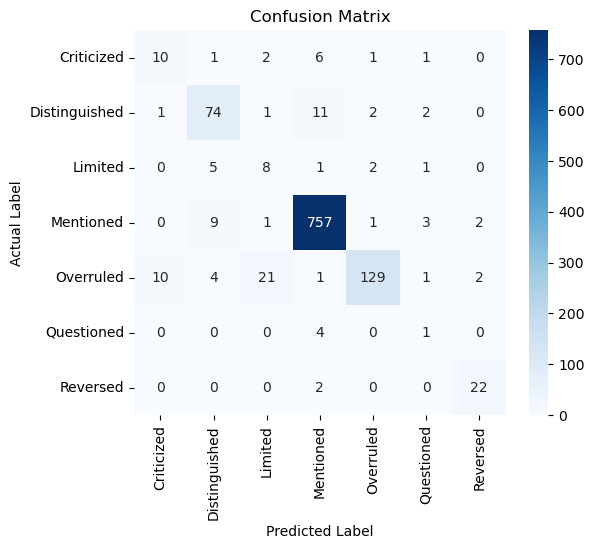

In [18]:
labels = sorted(list(set(y_true) | set(y_pred)))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# Run evaluation

In [20]:
labelled["Final_Label"].value_counts()

Final_Label
Overruled        162
Mentioned         78
Distinguished     10
Questioned         4
Reversed           1
Name: count, dtype: int64

In [21]:
labelled["gpt_prediction"].value_counts()

gpt_prediction
Overruled        125
Mentioned         86
Limited           19
Distinguished     10
Criticized        10
Reversed           3
Questioned         2
Name: count, dtype: int64

In [22]:
y_true = labelled["Final_Label"]
y_pred = labelled["gpt_prediction"]

In [23]:
report = classification_report(y_true, y_pred)
print(report)

               precision    recall  f1-score   support

   Criticized       0.00      0.00      0.00         0
Distinguished       0.30      0.30      0.30        10
      Limited       0.00      0.00      0.00         0
    Mentioned       0.86      0.95      0.90        78
    Overruled       1.00      0.77      0.87       162
   Questioned       0.00      0.00      0.00         4
     Reversed       0.33      1.00      0.50         1

     accuracy                           0.80       255
    macro avg       0.36      0.43      0.37       255
 weighted avg       0.91      0.80      0.84       255



/Users/rachelgao/anaconda3/envs/citator/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rachelgao/anaconda3/envs/citator/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rachelgao/anaconda3/envs/citator/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

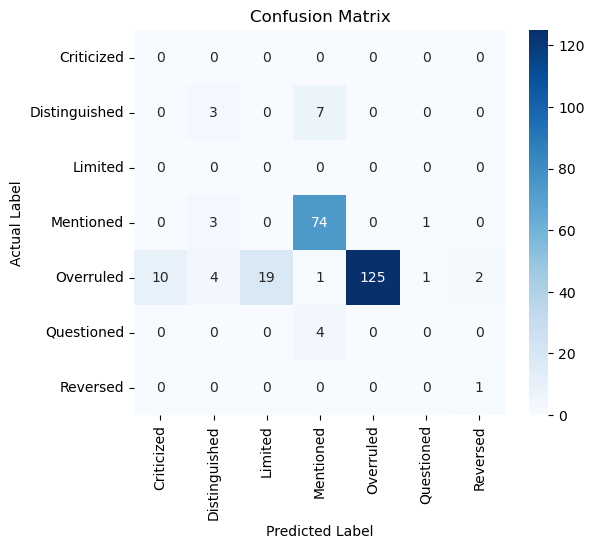

In [24]:
labels = sorted(list(set(y_true) | set(y_pred)))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [25]:
eval_df.to_csv("predictions/eval_df.csv", index=False)